# Popular US Baby Names 

## Topics Covered:

- [Obtaining Files](#Obtainting-Baby-Name-Files)


- [Importing, Merging, and Exporting Files](#Importing,-Merging,-and-Exporting-Files)


- [Most Popular Names in 1964](#Looking-at-the-Most-Popular-Names-in-the-Year-1964)
    - [Popular Names By Year Function](#Popular-Name-by-Year-Function)


- [Evergreen Names](#Names-that-Lasted-over-the-Past-140+-Years:-Evergreen-Names)


- [Aggregating Data](#Aggregating-Data)
    - [Function for Name Lookups](#Function-for-name-lookups)


- [Most Popular Names Across Time](#Most-Popular-Names-Across-Time)
    - [Top Female and Male Names Across Time: Visual](#Visualizing-Aggregated-Top-Female-and-Male-Names)


- [General Trends and Measuring "True" Popularity](#General-Trends-Over-Time:-True-Popularity)
    - [Popularity Feature](#Popularity-Feature)
    - [Relative Rank Feature](#Relative-Rank-Feature)
    - [Highest Ranking Names of All Time Function](#Function-for-Highest-Ranking-Names-of-All-Time)
    - [Registered Baby Names Across Time: Visual](#Registered-Baby-Names-Across-Time:-Visual)
    - [Unique Baby Names Across Time: Visual](#Unique-Baby-Names-Across-Time:-Visual)
 
 
- [Visualizing Name Trends Over Time](#Visualizing-Name-Trends-Over-Time)

------------------------------------------------------------------------------

## Obtainting Baby Name Files

<u>Website:</u>

https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-data

<br></br>
<u>About the data:</u>

The data (name, year of birth, sex, and number) are from a 100 percent sample of Social Security card applications for 1880 onward (until 2020). Metadata Updated: July 3, 2021

<br></br>
<u>Instructions:</u>
<b>Download</b> and <b>unzip</b> the file.

------------------------------------------------------------------------------

## Importing, Merging, and Exporting Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

peek = pd.read_csv('names/yob1880.txt')
peek

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578
...,...,...,...
1994,Woodie,M,5
1995,Worthy,M,5
1996,Wright,M,5
1997,York,M,5


Let's Clean up the DataFrame a bit...

In [2]:
cleanup = pd.read_csv('names/yob1880.txt', header = None, 
                      names = ["Name","Gender","Count"])
cleanup

,Name,Gender,Count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


We see from the above that the DF is already sorted by most popular name (in this case in the year 1880 the most popular name is Mary) by looking at the "Count" column we see that it is descending. 

In [3]:
cleanup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2000 non-null   object
 1   Gender  2000 non-null   object
 2   Count   2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


Taking a look into the summary of the DataFrame, we see that there are no missing values (non-null) and the data types we will be working with (Name, Gender columns are all text while Count is all integers)

Now that we have seen what is in the .txt files, we can just merge all datasets (all 141 .txt files from years 1880-2020 inclusive) into a single DataFrame

In [4]:
years = list(range(1880,2021))
# 2021 because in python range function, second parameter is last exclusive

dataframes = [] # Empty list to store all 141 datasets

for year in years: 
    data = pd.read_csv('names/yob{}.txt'.format(year), 
                        header = None, 
                        names = ["Name","Gender","Count"])
    
    dataframes.append(data) 
    # For all year, append that file data into the empty list we made earlier
    
df = pd.concat(dataframes, axis = 0, keys = years, 
               names = ["Year"]).droplevel(1).reset_index()

We vertically concatenate all data frames, passing "years" to keys parameter so data frames get the keys: 1880, 1881, 1882, ... , 2020. We create a new index level called "Years", drop the inner index level, and reset the index.

In [5]:
df # Inspecting our data concatenated dataframe

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2020858,2020,Zykell,M,5
2020859,2020,Zylus,M,5
2020860,2020,Zymari,M,5
2020861,2020,Zyn,M,5


In [6]:
df.info() # Looking at the summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020863 entries, 0 to 2020862
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 61.7+ MB


By combining all our data sets (baby name files) we have a combined data frame spanning over 2 million rows!

Exporting to .csv File to Store on Local Machine for Future Use:

In [7]:
df.to_csv('us_baby_names_1880_to_2020.csv', index = False)

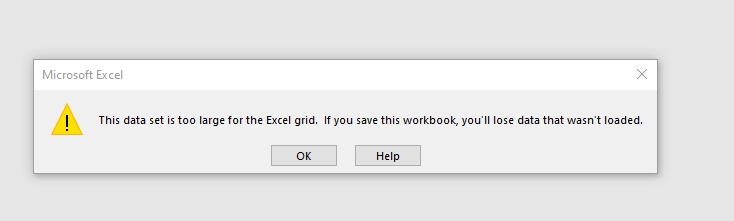

The beauty of python and jupyter notebooks is that you can work with very large data sets that are otherwise too large for excel/ google sheets to handle.

------------------------------------------------------------------------------

## Looking at the Most Popular Names in the Year 1964

Fun Fact:

"During the baby boom in the U.S. - there was a increase in the birth rate between 1946 and 1964. The hardships and uncertainties of the Great Depression and World War II led to many couples delay marriage and many couples to delay having children. The war's end, followed by a sustained period of economic prosperity, was followed by a surge in population."

-- Encyclopedia Britannica [https://www.britannica.com/topic/baby-boom-US-history]

In [8]:
pd.options.display.float_format = '{:,2f}'.format # To 2 decimal places

In [9]:
df = pd.read_csv('us_baby_names_1880_to_2020.csv')

df.info() # Checking number of unique values in the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020863 entries, 0 to 2020862
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 61.7+ MB


In [10]:
df.nunique()

Year         141
Name      100364
Gender         2
Count      13813
dtype: int64

Because "Gender" column only has 2 unique values, we can convert the data type from "object" to "category". This allows us to save some memory usage. More info. regarding categories here: https://pbpython.com/pandas_dtypes_cat.html

In [11]:
df.Gender = df.Gender.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020863 entries, 0 to 2020862
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   Year    int64   
 1   Name    object  
 2   Gender  category
 3   Count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 48.2+ MB


Notice how we saved ~13.5mb of memory here. 

In [12]:
names_1964 = df[df.Year == 1964].copy() # Only interested in names from 1964
names_1964

,Year,Name,Gender,Count
621117,1964,Lisa,F,54272
621118,1964,Mary,F,40985
621119,1964,Susan,F,31516
621120,1964,Karen,F,30247
621121,1964,Patricia,F,26086
...,...,...,...,...
633511,1964,Zac,M,5
633512,1964,Zalman,M,5
633513,1964,Zedric,M,5
633514,1964,Zeno,M,5


In [13]:
# Most popular Female names in 1964:

names_1964[names_1964.Gender =='F'].nlargest(1, "Count")

,Year,Name,Gender,Count
621117,1964,Lisa,F,54272


In [14]:
# Most popular Male names in 1964:

names_1964[names_1964.Gender == 'M'].nlargest(1, "Count")

,Year,Name,Gender,Count
628922,1964,Michael,M,82642


We see that the most popular name for Females in 1964 is "<i>Lisa</i>" and for Males it's "<i>Michael</i>". While we're at it let's create a function that grabs the top "n" most popular names by gender of <b>any year</b>.

### Popular Name by Year Function

In [15]:
def pop_names_by_year(year, gender, n):
    return df[(df.Year == year) & 
              (df.Gender == gender)].nlargest(n, "Count")

In [16]:
pop_names_by_year(2020, 'F', 5) # Top 5 Female names in 2020

,Year,Name,Gender,Count
1989592,2020,Olivia,F,17535
1989593,2020,Emma,F,15581
1989594,2020,Ava,F,13084
1989595,2020,Charlotte,F,13003
1989596,2020,Sophia,F,12976


In [17]:
pop_names_by_year(2020, 'M', 5) # Top 5 Male names in 2020

,Year,Name,Gender,Count
2006952,2020,Liam,M,19659
2006953,2020,Noah,M,18252
2006954,2020,Oliver,M,14147
2006955,2020,Elijah,M,13034
2006956,2020,William,M,12541


------------------------------------------------------------------------------

## Names that Lasted over the Past 140+ Years: Evergreen Names 

Before we start digging into the data, we should defind what a "popular" name is. To keep things simple for now, let's just say any in the top 15 positions can be considered as popular. We will take a look at both genders.

In [18]:
f_1880 = pop_names_by_year(1880, 'F', 15) 
# Top 15 Female names in 1880

f_2020 = pop_names_by_year(2020, 'F', 15) 
# Top 15 Famale names in 2020

m_1880 = pop_names_by_year(1880, 'M', 15) 
# Top 15 Male names in 1880

m_2020 = pop_names_by_year(1880, 'M', 15) 
# Top 15 Male names in 2020

# Merging 2020 data with 1880 data to get one overall data frame
f_2020[["Name", "Count"]].merge(f_1880[["Name", "Count"]], 
                                how = "inner", on = "Name")

,Name,Count_x,Count_y
0,Emma,15581,2003
1,Ella,7303,1156


In [19]:
# Do the same for Male names
m_2020[["Name", "Count"]].merge(m_1880[["Name", "Count"]], 
                                how = "inner", on = "Name")

,Name,Count_x,Count_y
0,John,9655,9655
1,William,9532,9532
2,James,5927,5927
3,Charles,5348,5348
4,George,5126,5126
5,Frank,3242,3242
6,Joseph,2632,2632
7,Thomas,2534,2534
8,Henry,2444,2444
9,Robert,2415,2415


In [20]:
# "Count_x" and "Count_y" here for the two tables are unclear, we need to adjust labels
# We can do this by editing the suffixes when we merge:
f_evergreen_names = f_2020[["Name", "Count"]].merge(
                    f_1880[["Name", "Count"]], 
                    how = "inner", on = "Name",
                    suffixes = ("_2020", "_1880"))

m_evergreen_names = m_2020[["Name", "Count"]].merge(
                    m_1880[["Name", "Count"]],
                    how = "inner", on = "Name",
                    suffixes = ("_2020", "_1880"))

In [21]:
f_evergreen_names

,Name,Count_2020,Count_1880
0,Emma,15581,2003
1,Ella,7303,1156


In [22]:
m_evergreen_names

,Name,Count_2020,Count_1880
0,John,9655,9655
1,William,9532,9532
2,James,5927,5927
3,Charles,5348,5348
4,George,5126,5126
5,Frank,3242,3242
6,Joseph,2632,2632
7,Thomas,2534,2534
8,Henry,2444,2444
9,Robert,2415,2415


Looking at the top names we see that the most popular Female names in 1880 that are still used in 2020 are: "<i>Emma</i>" and "<i>Ella</i>" while for Males, the top 3 are: "<i>John</i>", "<i>William</i>", and "<i>James</i>". 

Note that this does not necessarily mean these names are the most popular of all time. It just looks at the top names in 1880 and compares it to top names in 2020 (hence "evergreen").

------------------------------------------------------------------------------

## Aggregating Data

What if we want to get the total count for all names from 1880 to 2020?

In [23]:
df = pd.read_csv('us_baby_names_1880_to_2020.csv')

# Group our data frame by name and gender 
# (some names are unisex - we are considering all combinations)
df.groupby(["Name", "Gender"]).Count.sum()

Name     Gender
Aaban    M         120
Aabha    F          46
Aabid    M          16
Aabidah  F           5
Aabir    M          10
                  ... 
Zyvion   M           5
Zyvon    M           7
Zyyanna  F           6
Zyyon    M           6
Zzyzx    M          10
Name: Count, Length: 111472, dtype: int64

Here we get a pandas series with a multi index on the left side with all combinations of name and gender.

In [24]:
# Removing multi index and converting the inner index level "Gender" into an ordinary column
# We can do this by resetting the index at column position -1

df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,120
Aabha,F,46
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [25]:
# Aggregating the data using the .agg method by name and gender

# Total = total occurances of that name
# First_Appearance = first year the name appeared
# Last_Appearance = last year the name appeared
# Num_Years_Appeared = number of appearances made from 1880-2020 (last year appeared - first year appeared)
# Max_Count = the maximum number of times the name has shown up for a given year

agg_names = df.groupby(["Name", "Gender"]).agg(
                                           Total = ("Count", "sum"),
                                           First_Appearance = ("Year","min"),
                                           Last_Appearance = ("Year", "max"),
                                           Num_Years_Appeared = ("Count", "count"),
                                           Max_Count = ("Count", "max"))

agg_names

,,Total,First_Appearance,Last_Appearance,Num_Years_Appeared,Max_Count
Name,Gender,,,,,
Aaban,M,120,2007,2019,12,16
Aabha,F,46,2011,2020,7,9
Aabid,M,16,2003,2018,3,6
Aabidah,F,5,2018,2018,1,5
Aabir,M,10,2016,2018,2,5
...,...,...,...,...,...,...
Zyvion,M,5,2009,2009,1,5
Zyvon,M,7,2015,2015,1,7
Zyyanna,F,6,2010,2010,1,6


Taking the name "Aaban" (Male) for example, it has a total count of 120. The name first appeared in 2007 and last appeared in 2019, making it appear for 12 years straight. The maximum number of times it appeared for a year from 1880-2020 is 16. 

We will now add a column to the data frame to determine exactly what year it was when the name showed up the most (which year is responsible for the Max_Count?)

In [26]:
# For each and every combination of name and gender we get,
# get the Year of the row with the largest number in the count column

def max_count_year(group):
    return group.nlargest(1, "Count").Year

# Documentation for .nlargest: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html 

In [27]:
name_max_count_year = df.groupby(["Name", "Gender"]).apply(max_count_year)
name_max_count_year

Name     Gender         
Aaban    M       1817991    2014
Aabha    F       1804244    2014
Aabid    M       1954228    2018
Aabidah  F       1941027    2018
Aabir    M       1890732    2016
                            ... 
Zyvion   M       1658235    2009
Zyvon    M       1856308    2015
Zyyanna  F       1675211    2010
Zyyon    M       1824606    2014
Zzyzx    M       1692320    2010
Name: Year, Length: 111472, dtype: int64

We see that for the the male name "Aaban", the most occurances of the name was in the year 2014. What we have here is a pandas series with a multi index (3 index levels). We also have a row label of the particular combination in the original data frame (df) that we can just drop. 

In [28]:
name_max_count_year.droplevel(level = -1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 111472, dtype: int64

In [29]:
# Adding the year of max_count back to the aggregated data frame

agg_names["Max_Count_Year"] = name_max_count_year.droplevel(level = -1)
agg_names

,,Total,First_Appearance,Last_Appearance,Num_Years_Appeared,Max_Count,Max_Count_Year
Name,Gender,,,,,,
Aaban,M,120,2007,2019,12,16,2014
Aabha,F,46,2011,2020,7,9,2014
Aabid,M,16,2003,2018,3,6,2018
Aabidah,F,5,2018,2018,1,5,2018
Aabir,M,10,2016,2018,2,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,2009,2009,1,5,2009
Zyvon,M,7,2015,2015,1,7,2015
Zyyanna,F,6,2010,2010,1,6,2010


In [30]:
agg_names.reset_index(inplace = True)
agg_names

,Name,Gender,Total,First_Appearance,Last_Appearance,Num_Years_Appeared,Max_Count,Max_Count_Year
0,Aaban,M,120,2007,2019,12,16,2014
1,Aabha,F,46,2011,2020,7,9,2014
2,Aabid,M,16,2003,2018,3,6,2018
3,Aabidah,F,5,2018,2018,1,5,2018
4,Aabir,M,10,2016,2018,2,5,2016
...,...,...,...,...,...,...,...,...
111467,Zyvion,M,5,2009,2009,1,5,2009
111468,Zyvon,M,7,2015,2015,1,7,2015
111469,Zyyanna,F,6,2010,2010,1,6,2010
111470,Zyyon,M,6,2014,2014,1,6,2014


If we want to get the data for a particular name for each gender we can do the following:

In [31]:
agg_names[(agg_names.Name == "Jackie") & 
          ((agg_names.Gender == "M") | 
           (agg_names.Gender == "F"))]

,Name,Gender,Total,First_Appearance,Last_Appearance,Num_Years_Appeared,Max_Count,Max_Count_Year
42773,Jackie,F,90850,1899,2020,122,4253,1961
42774,Jackie,M,78608,1904,2020,113,2053,1951


### Function for name lookups

In [32]:
# Creating a function for faster future lookups

def name_info(name):
    return agg_names[(agg_names.Name == name) & 
                     ((agg_names.Gender == "M") | 
                      (agg_names.Gender == "F"))]

name_info('Jack')

,Name,Gender,Total,First_Appearance,Last_Appearance,Num_Years_Appeared,Max_Count,Max_Count_Year
42753,Jack,F,2684,1889,2020,121,96,1928
42754,Jack,M,712342,1880,2020,141,12801,1927


------------------------------------------------------------------------------

## Most Popular Names Across Time

We will now use the aggregated data framework to determine the most popular names of all time (top 10 most popular female and male names). 

In [33]:
agg_names.groupby("Gender").apply(
    lambda x: x.nlargest(10, "Total"))

Name Gender    Total  First_Appearance  Last_Appearance  \
Gender                                                                        
F      70118        Mary      F  4130314              1880             2020   
       31344   Elizabeth      F  1653689              1880             2020   
       80882    Patricia      F  1572554              1884             2020   
       47557    Jennifer      F  1468730              1916             2020   
       64325       Linda      F  1453408              1880             2020   
       12066     Barbara      F  1435049              1880             2020   
       68798    Margaret      F  1253426              1880             2020   
       96512       Susan      F  1122251              1880             2020   
       29162     Dorothy      F  1108769              1880             2020   
       89415       Sarah      F  1084272              1880             2020   
M      44536       James      M  5190161              1880             2020   
       49410        John      M  5142243              1880             2020   
       86236      Robert      M  4829631              1880             2020   
       72511     Michael      M  4383488              1880             2020   
       106736    William      M  4143886              1880             2020   
       24738       David      M  3638877              1880             2020   
       50220      Joseph      M  2631147              1880             2020   
       85656     Richard      M  2569278              1880             2020   
       18771     Charles      M  2405574              1880             2020   
       100560     Thomas      M  2325071              1880             2020   

               Num_Years_Appeared  Max_Count  Max_Count_Year  
Gender                                                        
F      70118                  141      73985            1921  
       31344                  141      20749            1990  
       80882                  137      56444            1951  
       47557                  103      63604            1972  
       64325                  141      99693            1947  
       12066                  141      48794            1947  
       68798                  141      28468            1921  
       96512                  141      47419            1955  
       29162                  141      39999            1924  
       89415                  141      28487            1982  
M      44536                  141      94764            1947  
       49410                  141      88319            1947  
       86236                  141      91647            1947  
       72511                  141      92718            1957  
       106736                 141      66992            1947  
       24738                  141      86323            1955  
       50220                  141      32730            1956  
       85656                  141      58875            1946  
       18771                  141      40774            1947  
       100560                 141      48648            1952

We now have a multi index data frame with the 10 most popular female and male names. In the outer level we have Gender, but in the inner index level we have row labels that are not really meaningful. We can just reindex our data frame by removing the multi index and creating a range index instead.

In [34]:
popular_names_of_all_time = agg_names.groupby("Gender").apply(
    lambda x: x.nlargest(10, "Total")).reset_index(drop = True)


popular_names_of_all_time

,Name,Gender,Total,First_Appearance,Last_Appearance,Num_Years_Appeared,Max_Count,Max_Count_Year
0,Mary,F,4130314,1880,2020,141,73985,1921
1,Elizabeth,F,1653689,1880,2020,141,20749,1990
2,Patricia,F,1572554,1884,2020,137,56444,1951
3,Jennifer,F,1468730,1916,2020,103,63604,1972
4,Linda,F,1453408,1880,2020,141,99693,1947
5,Barbara,F,1435049,1880,2020,141,48794,1947
6,Margaret,F,1253426,1880,2020,141,28468,1921
7,Susan,F,1122251,1880,2020,141,47419,1955
8,Dorothy,F,1108769,1880,2020,141,39999,1924
9,Sarah,F,1084272,1880,2020,141,28487,1982


Next, let's visualize this data using a seaborn bar plot.

### Visualizing Aggregated Top Female and Male Names

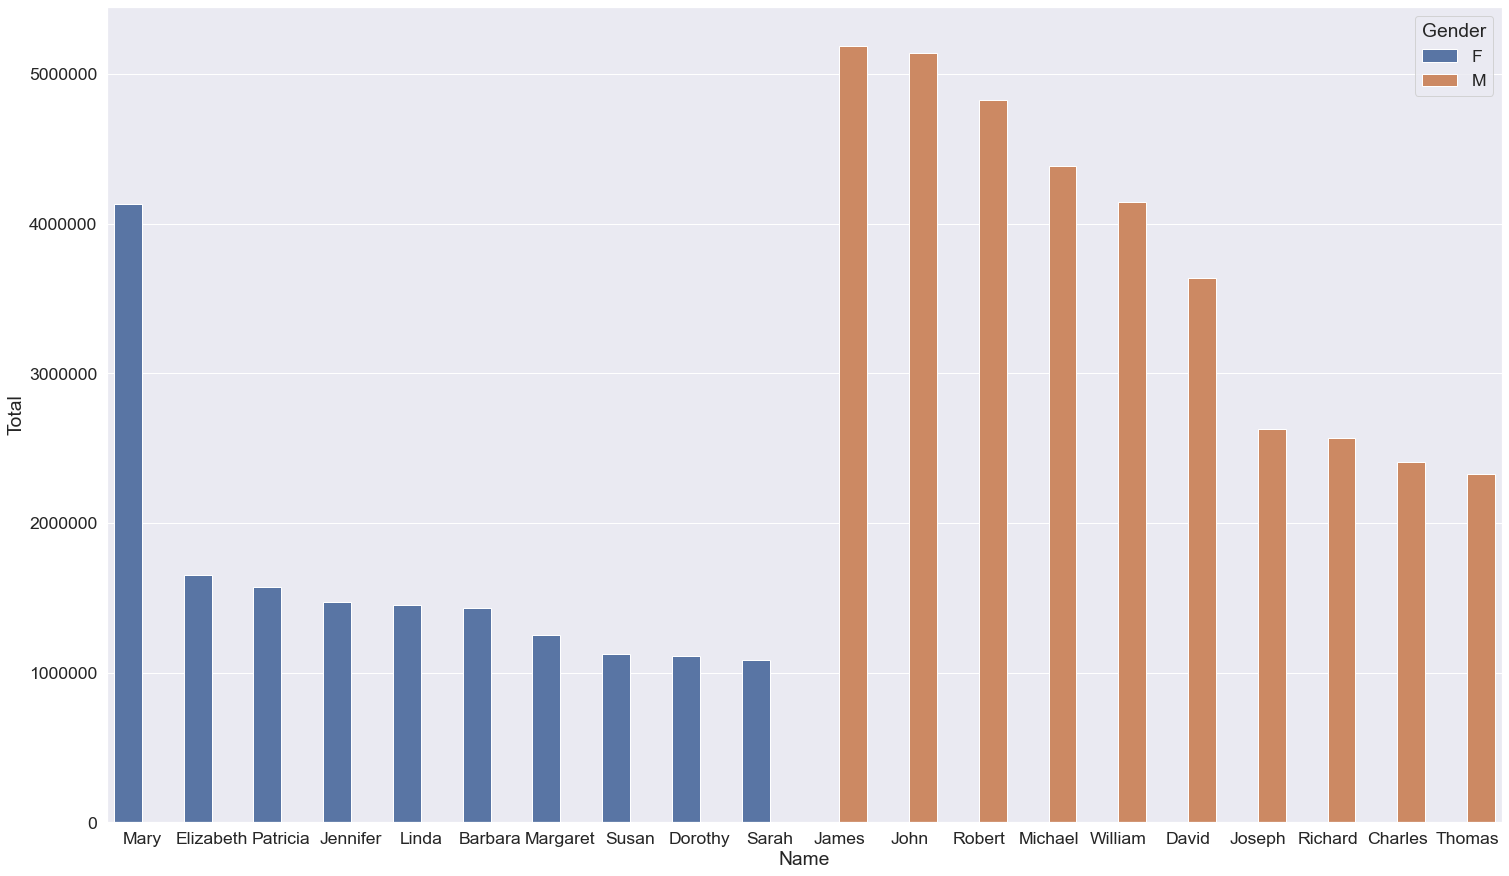

In [35]:
plt.figure(figsize = (25,15))
sns.set(font_scale=1.6)
plt.ticklabel_format(style='plain', axis='y')

sns.barplot(x = "Name", y = "Total", 
            data = popular_names_of_all_time, hue = "Gender")

plt.show()

------------------------------------------------------------------------------

## General Trends Over Time: True Popularity

So far we've worked with the "Count" metric which is an absolute number, for example, taking a look at the number of Females named "Mary" in 1880 we get around 7,000. This is generally not a good measure of popularity because we did not take into account the total number of registered female names in 1880. So let's find the "true" popularity or in other words, the <b>relative</b> count (i.e. per 1 million babies).

In [36]:
pd.options.display.float_format = '{:.0f}'.format # Don't show decimals

babies_per_year = df.groupby("Year").Count.sum()
babies_per_year

Year
1880     201484
1881     192691
1882     221533
1883     216944
1884     243461
         ...   
2016    3662277
2017    3568294
2018    3505963
2019    3455946
2020    3305259
Name: Count, Length: 141, dtype: int64

This returns a pandas series and we see that in the year 1880 we have around ~201,500 baby names <b>registered</b> and that number increased to 3.3 million 140 years later (factor of ~16.4). We can assume that 2 major reasons contributed to this:

1. Births steadily increased over time
2. Number of registered babies increased over time

We need to keep in mind that the counts (Total) in our data set does not equal the number of births. It only reflects the number of registers - and only those names with occurances over five in a particular year. 

Let's visualize this trend over time.

### Registered Baby Names Across Time: Visual

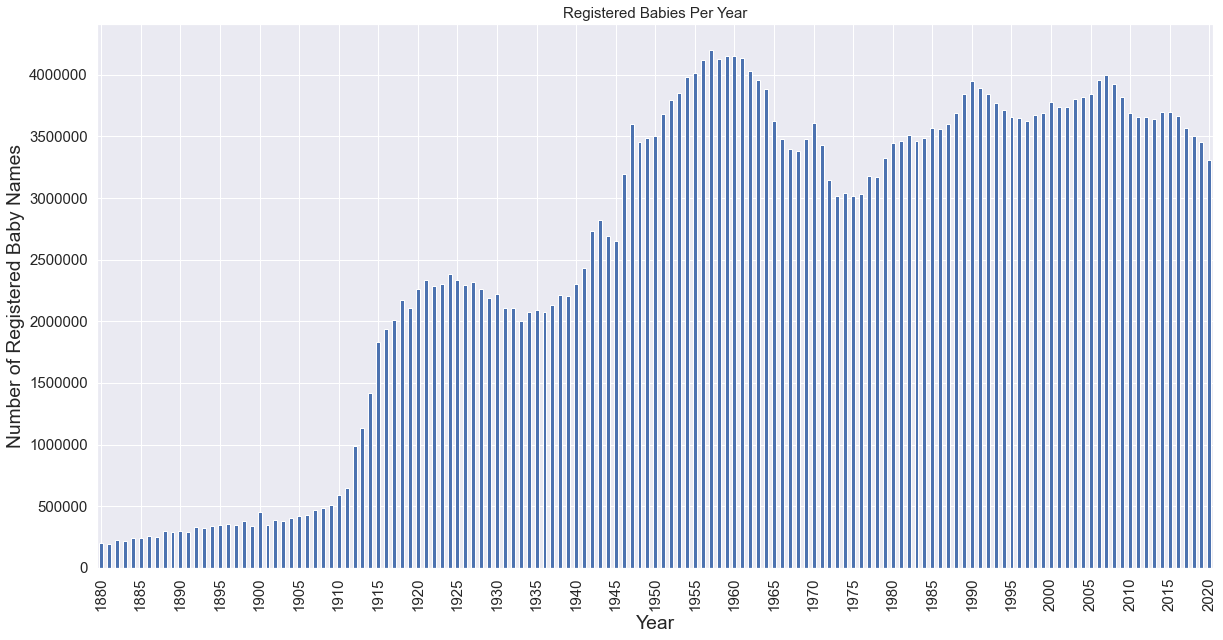

In [37]:
babies_per_year.plot(kind = 'bar', y = 'Count', 
                     figsize = (20,10), fontsize = 15)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), 
           labels = range(1880,2025,5))

plt.title("Registered Babies Per Year", fontsize = 15)
plt.ylabel("Number of Registered Baby Names")
plt.xlabel("Year")
plt.show()

Let's see if the number of unique names increased over time (are names getting more diverse?)

In [38]:
unique_names = df.groupby("Year").Name.count()

unique_names

Year
1880     2000
1881     1934
1882     2127
1883     2084
1884     2297
        ...  
2016    33031
2017    32634
2018    32178
2019    32030
2020    31271
Name: Name, Length: 141, dtype: int64

There is a steep increase in unique names from 1880 to 2020! 

Note that these counts include both genders (i.e. both male and female counts for the name "Jacky" are included in here)

### Unique Baby Names Across Time: Visual

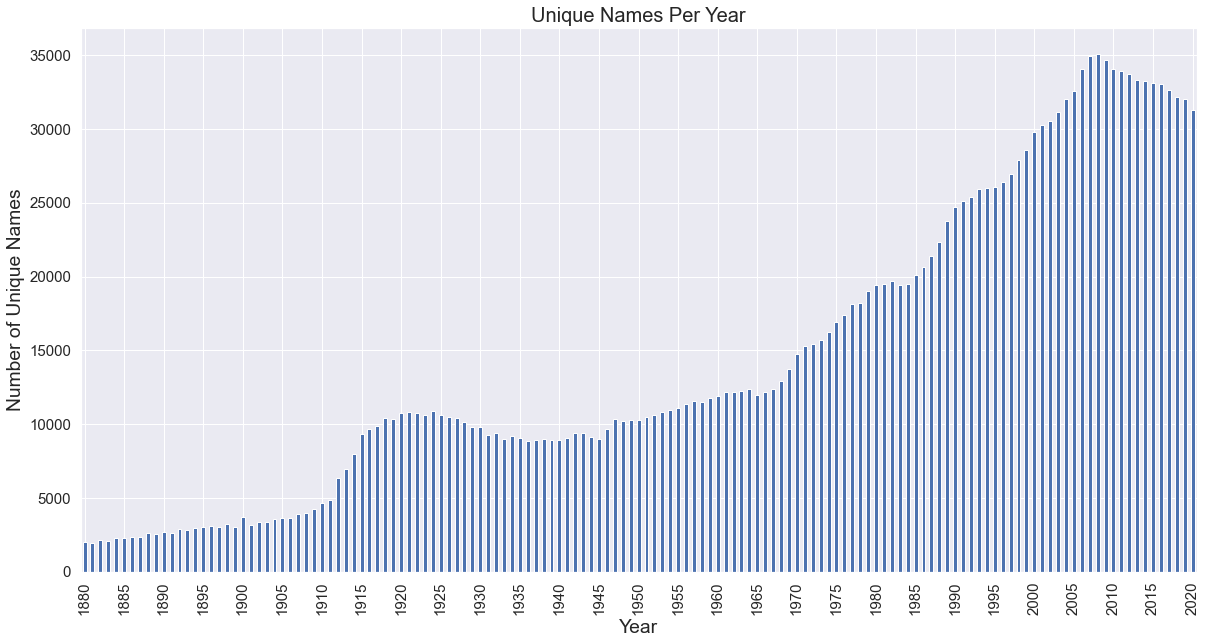

In [39]:
# Let's plot this data to see the trend in unique names over the years

unique_names.plot(kind = 'bar', figsize = (20, 10), 
                  fontsize = 15)

plt.xticks(ticks = (range(0, len(unique_names), 5)), 
           labels = range(1880, 2025, 5))

plt.title('Unique Names Per Year', fontsize = 20)
plt.ylabel("Number of Unique Names")
plt.xlabel("Year")
plt.show()

So now let's create the "popularity" and "rank" features now as these two will be better metrics for measuring true popularity than just total count. 

Popularity = relative frequency (let's use per 1 million)<br></br>
Rank = Ranking based off popularity instead of total count.

In [40]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2020858,2020,Zykell,M,5
2020859,2020,Zylus,M,5
2020860,2020,Zymari,M,5
2020861,2020,Zyn,M,5


In order to calculate the popularity feature (using the year 1880 and the name "Mary" as an example) we need to figure out the total count of "Mary" in 1880 (7,065) and divide it by the total female names in the same year (90,994). Lastly, in order to find the relative frequency per 1 million, we need to multiply the previous ratio by 1,000,000.

So for the female name "Mary" in 1880 the relative frequencey would look something like this if we did it by hand:

(7,065/90,994) * 1,000,000  --> which gives us a relative popularity of 77,642.482

### Popularity Feature

In [41]:
# First finding the total sum/ count of all names by "Year" and "Gender"

df.groupby(["Year", "Gender"]).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100738
1882  F          107847
                 ...   
2018  M         1810309
2019  F         1670419
      M         1785527
2020  F         1598836
      M         1706423
Name: Count, Length: 282, dtype: int64

In [42]:
# Taking the values in the "Count" column and dividing it by the group's specific total count
# and multiplying it with 1,000,000
# we then assign this to a new columh called, "Popularity" and put it in df

df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).
                                Count.transform("sum"))*1000000

df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
2020858,2020,Zykell,M,5,3
2020859,2020,Zylus,M,5,3
2020860,2020,Zymari,M,5,3
2020861,2020,Zyn,M,5,3


### Relative Rank Feature

To determine rank we, again, group df by "Year" and "Gender" and apply a lambda function (where we pass "False" to the ascending parameter) to rank the <b>most popular</b> name (highest popularity count) in the first position rather than last.

In [43]:
df["Rank"] = df.groupby(["Year", "Gender"]).Count.apply(
    lambda x: x.rank(ascending = False))

df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
2020858,2020,Zykell,M,5,3,12906
2020859,2020,Zylus,M,5,3,12906
2020860,2020,Zymari,M,5,3,12906
2020861,2020,Zyn,M,5,3,12906


### Function for Highest Ranking Names of All Time

In [44]:
def highest_ranking_by_year(year, gender, rankings):
    return df[(df.Year == year) & 
              (df.Gender == gender)].head(rankings).set_index("Rank")

highest_ranking_by_year(2020, "M", 10)

,Year,Name,Gender,Count,Popularity
Rank,,,,,
1,2020,Liam,M,19659,11521
2,2020,Noah,M,18252,10696
3,2020,Oliver,M,14147,8290
4,2020,Elijah,M,13034,7638
5,2020,William,M,12541,7349
6,2020,James,M,12250,7179
7,2020,Benjamin,M,12136,7112
8,2020,Lucas,M,11281,6611
9,2020,Henry,M,10705,6273


------------------------------------------------------------------------------

## Visualizing Name Trends Over Time

In [45]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
2020858,2020,Zykell,M,5,3,12906
2020859,2020,Zylus,M,5,3,12906
2020860,2020,Zymari,M,5,3,12906
2020861,2020,Zyn,M,5,3,12906


Before we visualize all names let's continue using "Mary" as an example for now and build upon that example. Say we want to visualize the popularity of the female name Mary from 1880-2020. We are going to plot the popularity against the ranking. So, if popularity decreases over time, ranking should increase and vice-versa. 

This means our plot will have 2 y-values, but just one x-value. The x-value will be years from 1880-2020, but the y-values will include popularity and ranking (one one each side of the graph - left and right). We will color code and label accordingly. 

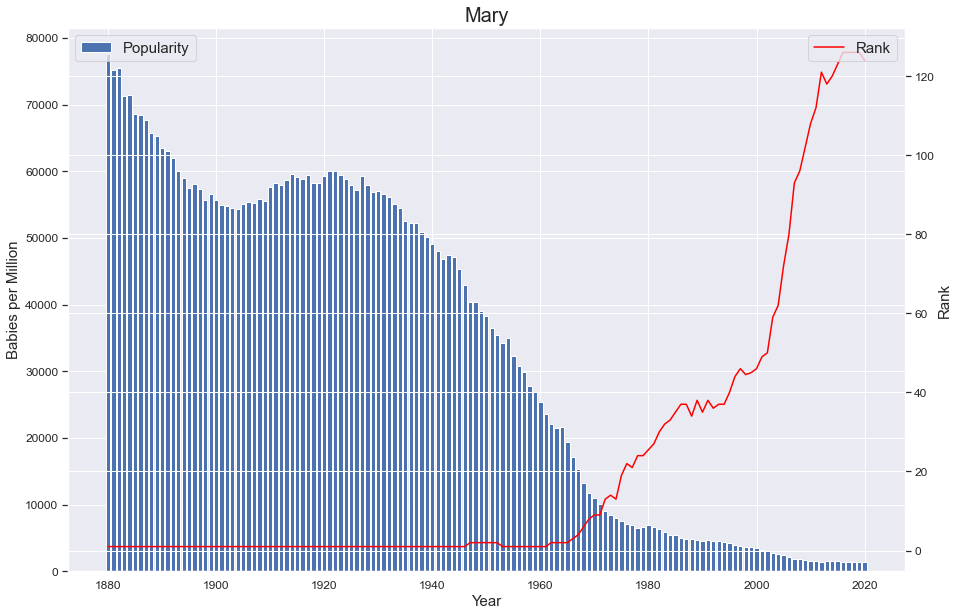

In [46]:
mary = df[(df.Name == 'Mary') & (df.Gender == 'F')]
# Selecting just the Mary series for now

fig, ax1 = plt.subplots(figsize = (15,10))
ax1.bar(x = mary.Year, height = mary.Popularity, label = 'Popularity')

ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = 'Red', label = 'Rank')

ax1.set_title("Mary", fontsize = 20)
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per Million", fontsize = 15)
ax1.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)

ax2.set_ylabel("Rank", fontsize = 15)
ax2.tick_params(labelsize = 12)
ax2.legend(loc = 1, fontsize = 15)

plt.show()

Let's create a function that allows us to look at a visualization like this for whatever name we pass in

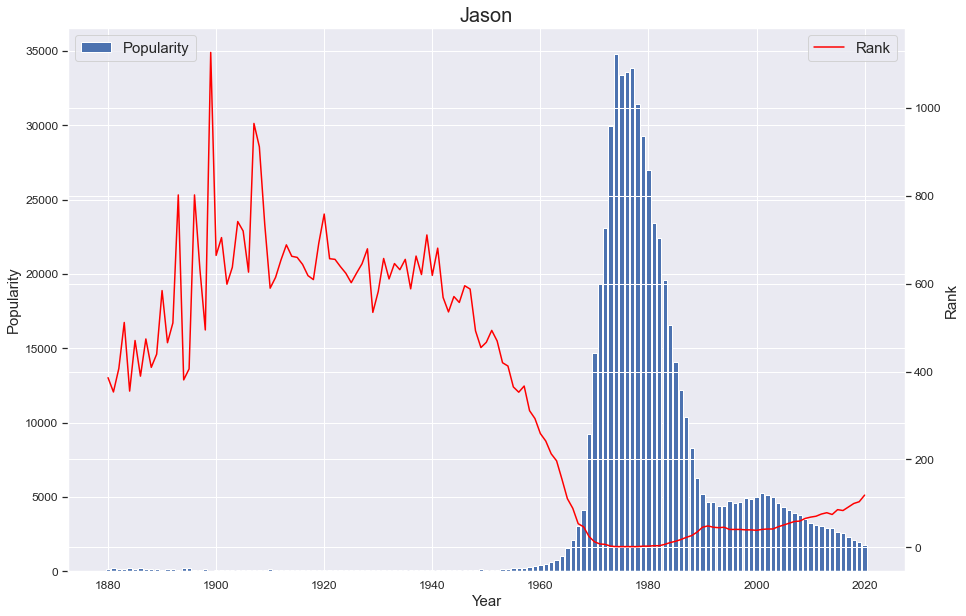

In [47]:
def name_popularity_plot(name, gender, crit = "Popularity"):
    name_data = df.loc[(df.Name == name) & (df.Gender == gender), 
                       ["Name","Gender","Year","Rank",crit]]
    
    name_data = name_data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (15,10))
    ax1.bar(x = name_data.index, height = name_data[crit], 
            label = crit)
    
    ax2 = ax1.twinx()
    ax2.plot(name_data.index, name_data.Rank, 
             color = 'Red', label = 'Rank')
    
    ax1.set_title(name, fontsize = 20)
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax1.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    
    ax2.set_ylabel("Rank", fontsize = 15)
    ax2.tick_params(labelsize = 12)
    ax2.legend(loc = 1, fontsize = 15)
    
    plt.show()
    
name_popularity_plot("Jason", "M")